# Práctico 2 - Regresión lineal y regularización

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Datos de entrenamiento
X_train = np.array([206, 188, 219, 372, 345, 231, 203, 170, 55, 91, 292, 141, 129, 170, 324]).reshape(-1, 1)
y_train = np.array([29, 25, 31, 25, 29, 30, 26, 23, 12, 15, 28, 24, 23, 22, 30])

# Datos de validación
X_val = np.array([213, 80, 391, 250, 57, 303, 263, 157, 72, 157, 188, 216, 362, 283, 308]).reshape(-1, 1)
y_val = np.array([30, 16, 25, 26, 9, 28, 28, 25, 13, 23, 26, 25, 28, 33, 30])

## 1. Regresión lineal


Definir y entrenar un modelo de regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Predecir en los conjuntos de train y val

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

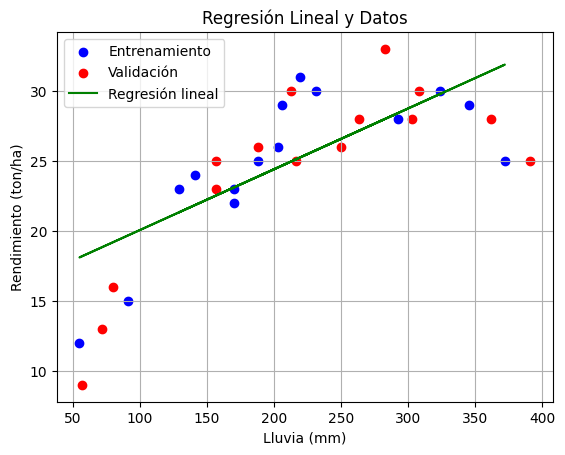

In [ ]:
# Gráfica de datos de entrenamiento, validación y recta de regresión
plt.scatter(X_train, y_train, color='blue', label='Entrenamiento')
plt.scatter(X_val, y_val, color='red', label='Validación')
plt.plot(X_train, y_pred_train, color='green', label='Regresión lineal')
plt.legend()
plt.xlabel('Lluvia (mm)')
plt.ylabel('Rendimiento (ton/ha)')
plt.title('Regresión Lineal y Datos')
plt.grid(True)
plt.show()


## 2. MSE en entrenamiento, validación y CV

Calcular MSE en los conjuntos de entrenamiento y validación, y el MSE promedio con validación cruzada 5-folds.

In [ ]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

In [ ]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_val = mean_squared_error(y_val, y_pred_val)
mse_cv = cross_val_score(model, X_train,  y_train, scoring=make_scorer(mean_squared_error), cv=5)

print(f"MSE Entrenamiento: {mse_train}")
print(f"MSE Validación: {mse_val}")
print(f"MSE CV: {np.mean(mse_cv)}")

MSE Entrenamiento: 12.780502233244631
MSE Validación: 17.578253618682638
MSE CV: 23.60932500511161



## 3. Determinar el grado óptimo


Para cada grado del polinomio (entre 1 y 5), entrenar un modelo de regresión lineal y calcular los MSE. En función de esto determinar el grado óptimo.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
degrees = 5
mse_train_vals = []
mse_val_vals = []
mse_cv_vals = []

for degree in range(1, degrees + 1):
    #COMPLETAR
    poly = PolynomialFeatures(degree)
    x_poly_train = poly.fit_transform(X_train)
    model = LinearRegression()
    model.fit(x_poly_train, y_train)

    #val
    poly_val = PolynomialFeatures(degree)
    x_poly_val = poly_val.fit_transform(X_val)

    y_pred_poly_train = model.predict(x_poly_train)
    y_pred_poly_val = model.predict(x_poly_val)


    mse_train =  mean_squared_error(y_train, y_pred_poly_train)
    mse_val = mean_squared_error(y_val, y_pred_poly_val)
    mse_cv = cross_val_score(model, x_poly_train,  y_train, scoring=make_scorer(mean_squared_error), cv=5)

    mse_train_vals.append(mse_train)
    mse_val_vals.append(mse_val)
    mse_cv_vals.append(np.mean(mse_cv))


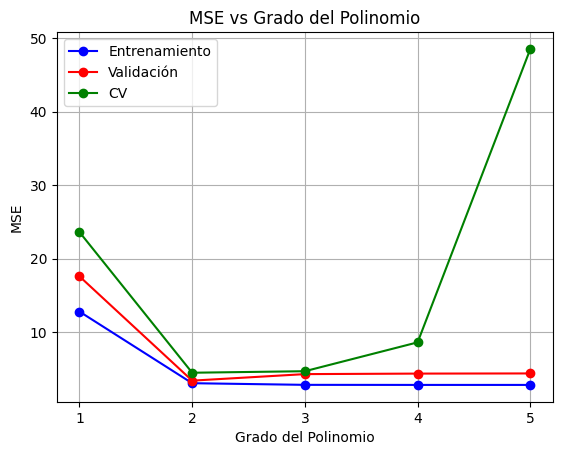

In [ ]:
# Gráfica de evolución de MSE con grado del polinomio
plt.plot(range(1, degrees + 1), mse_train_vals, label='Entrenamiento', color='blue', marker ='o', linestyle='-')
plt.plot(range(1, degrees + 1), mse_val_vals, label='Validación', color='red', marker ='o', linestyle='-')
plt.plot(range(1, degrees + 1), mse_cv_vals, label='CV', color='green', marker ='o', linestyle='-')
plt.xlabel('Grado del Polinomio')
plt.ylabel('MSE')
plt.grid(True)
plt.xticks(range(1, degrees + 1))
plt.title('MSE vs Grado del Polinomio')
plt.legend()
plt.show()

## Versión del punto 3 usando pipeline

Repetir el punto anterior utilizando un Pipeline. Estandarizar los datos.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
degrees = 5
mse_train_vals = []
mse_val_vals = []
mse_cv_vals = []

for degree in range(1, degrees + 1):
    # Crear pipeline
    pipeline = Pipeline([('scaler', StandardScaler()), ('poly' , PolynomialFeatures(degree)), ('reg', LinearRegression())])

    # Ajustar el modelo
    pipeline.fit(X_train, y_train)

    # Predecir y calcular errores
    y_pred_train = pipeline.predict(X_train)
    y_pred_val = pipeline.predict(X_val)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_val = mean_squared_error(y_val, y_pred_val)
    mse_cv = -np.mean(cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))

    mse_train_vals.append(mse_train)
    mse_val_vals.append(mse_val)
    mse_cv_vals.append(mse_cv)

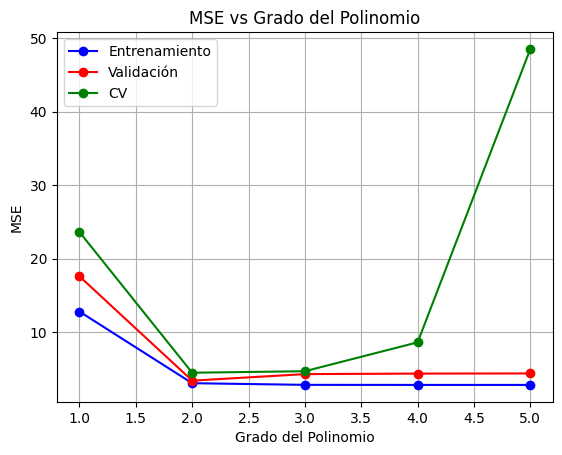

In [ ]:
# Gráfica de evolución de MSE con grado del polinomio
plt.plot(range(1, degrees + 1), mse_train_vals, label='Entrenamiento', color='blue', marker ='o', linestyle='-')
plt.plot(range(1, degrees + 1), mse_val_vals, label='Validación', color='red', marker ='o', linestyle='-')
plt.plot(range(1, degrees + 1), mse_cv_vals, label='CV', color='green', marker ='o', linestyle='-')
plt.xlabel('Grado del Polinomio')
plt.ylabel('MSE')
plt.title('MSE vs Grado del Polinomio')
plt.legend()
plt.grid(True)
plt.show()


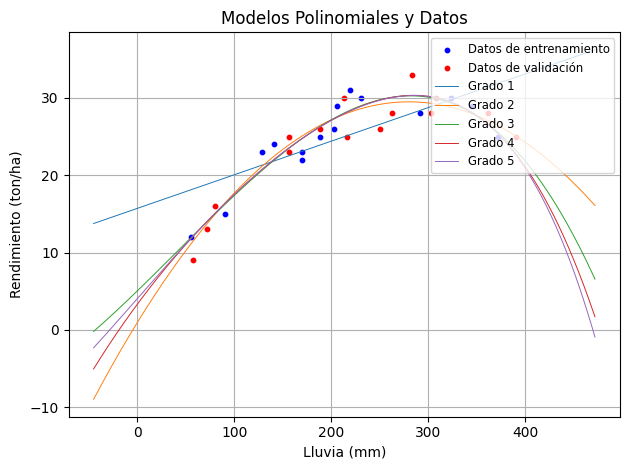

In [ ]:
# Gráfica de los modelos para cada grado del polinomio junto con los datos originales
plt.scatter(X_train, y_train, color='blue', s=10, label='Datos de entrenamiento')
plt.scatter(X_val, y_val, color='red', s=10, label='Datos de validación')

# Rango de X para las predicciones de la línea
X_range = np.linspace(X_train.min()-100, X_train.max()+100, 400).reshape(-1, 1)

for degree in range(1, degrees + 1):
    # Crear pipeline
    pipeline = Pipeline([('scaler', StandardScaler()), ('poly' , PolynomialFeatures(degree)), ('reg', LinearRegression())])
    # Ajustar el modelo
    pipeline.fit(X_train, y_train)
    # Predecir y graficar
    y_range_pred = pipeline.predict(X_range)
    plt.plot(X_range, y_range_pred, label=f'Grado {degree}', linewidth=0.7)

plt.xlabel('Lluvia (mm)')
plt.ylabel('Rendimiento (ton/ha)')
plt.title('Modelos Polinomiales y Datos')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()



## 4. λ óptimo para regresión polinomial de grado 5 con regularización

Encontrar el hiperparámetro de regularización λ óptimo para un modelo de regresión polinomial de grado 5.

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
degree = 5
alphas = np.logspace(-6, 6, 13)

poly = PolynomialFeatures(degree)
cv_ridge_reg = RidgeCV(alphas, scoring=None, store_cv_values=True, cv=None)
X_train_poly = poly.fit_transform(X_train)
cv_ridge_reg.fit(X_train_poly, y_train)
mse_alphas = np.mean(cv_ridge_reg.cv_values_, axis=0)
optimal_lambda = cv_ridge_reg.alpha_

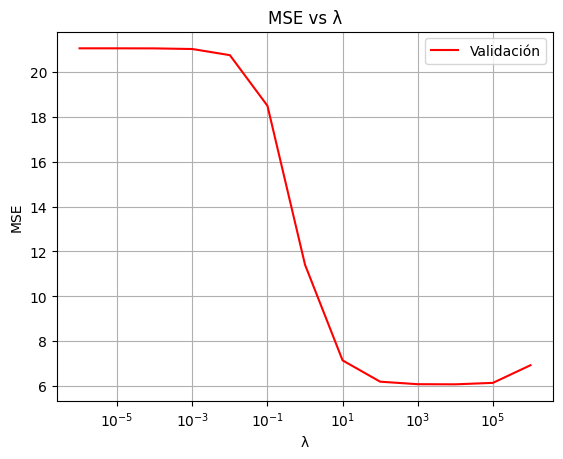

In [ ]:
# Gráfica de evolución de MSE con λ
plt.semilogx(alphas, mse_alphas, label='Validación', color='red')
plt.xlabel('λ')
plt.ylabel('MSE')
plt.title('MSE vs λ')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import Ridge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.50038e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


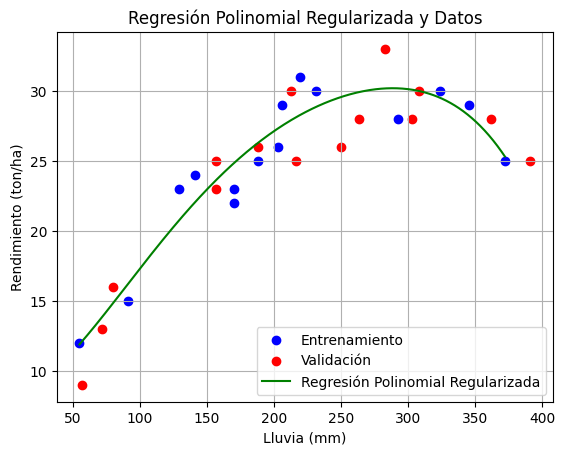

In [ ]:
# Gráfico del mejor modelo junto con datos de entrenamiento y validación
best_ridge = Ridge(alpha=optimal_lambda).fit(X_train_poly, y_train)
X_range = np.linspace(X_train.min(), X_train.max(), 400).reshape(-1, 1)
degree = 5
poly = PolynomialFeatures(degree)
X_range_poly = poly.fit_transform(X_range)
y_range_pred = best_ridge.predict(X_range_poly)

plt.scatter(X_train, y_train, color='blue', label='Entrenamiento')
plt.scatter(X_val, y_val, color='red', label='Validación')
plt.plot(X_range, y_range_pred, color='green', label='Regresión Polinomial Regularizada')
plt.legend()
plt.xlabel('Lluvia (mm)')
plt.ylabel('Rendimiento (ton/ha)')
plt.title('Regresión Polinomial Regularizada y Datos')
plt.grid(True)
plt.show()

In [ ]:
# Crear y ajustar el mejor modelo con el valor óptimo de lambda
best_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=5)),
    ('ridge', Ridge(alpha=optimal_lambda))
])

best_pipeline.fit(X_train, y_train)

# Predecir y calcular errores en entrenamiento y validación
y_pred_train_best = best_pipeline.predict(X_train)
y_pred_val_best = best_pipeline.predict(X_val)

mse_train_best = mean_squared_error(y_train, y_pred_train_best)
mse_val_best = mean_squared_error(y_val, y_pred_val_best)

print(f"Error cuadrático medio (MSE) en entrenamiento del mejor modelo: {mse_train_best:.3f}")
print(f"Error cuadrático medio (MSE) en validación del mejor modelo: {mse_val_best:.3f}")

Error cuadrático medio (MSE) en entrenamiento del mejor modelo: 2.800
Error cuadrático medio (MSE) en validación del mejor modelo: 4.500


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.50038e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


### **Ejercicio: Regresión en el Conjunto de Datos "Boston Housing"**

El conjunto de datos "Boston Housing" es un clásico en machine learning y estadística. Contiene información recopilada por el Servicio de Censos de EE.UU. sobre viviendas en el área de Boston. El dataset contiene 506 observaciones y 13 atributos que pueden influir en el valor mediano de las viviendas en Boston.

**Objetivo:** Predice el valor mediano de las viviendas (MEDV) usando atributos como la tasa de criminalidad (CRIM), la cantidad promedio de habitaciones por vivienda (RM), entre otros.

**Instrucciones:**

1. **Carga y Análisis Inicial:** Carga el conjunto de datos "Boston Housing" y realiza un análisis exploratorio inicial.
2. **Preprocesamiento:** Divide el conjunto de datos en conjuntos de entrenamiento y validación.
3. **Modelo Lineal:** Entrena una regresión lineal usando todas las características para predecir MEDV. Evalúa su rendimiento en los conjuntos de entrenamiento y validación usando el error cuadrático medio (MSE).
4. **Modelo Polinomial:** Considera las características polinomiales hasta el grado 3. Entrena el modelo y evalúa su rendimiento.
5. **Regularización:** Usa la regresión Ridge con las características polinomiales. Encuentra el valor óptimo de \( \lambda \) usando validación cruzada.
6. **Gráficas:**
    * Grafica la evolución del MSE en función del grado del polinomio.
    * Grafica el MSE en función de \( \lambda \) para Ridge.
    * Visualiza el mejor modelo polinomial con y sin regularización en comparación con los datos reales.
7. **Conclusiones:** ¿qué modelo considerarías el mejor? ¿Cómo impactan las características polinomiales y la regularización en el rendimiento del modelo?